# Data prediction using Linear Regression

Regression searches for relationships among variables. For example, several employees of some company try to understand how their salaries depend on their features, such as experience, education level, role, city of employment, and so on.

In the case of this project, the example is similar in nature, since we want to determine the price of a car by making use of their attributes, which are represented in the following data, which is already clean and processed.

In [78]:
# Import libraries that are relevant for this project
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp

In [79]:
# Import dataframe from previously cleaned data
df = pd.read_csv("..\\data\\automobile_clean.csv")
df.head(5)

,symboling,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,93.0,168.8,...,130,mpfi,3.47,2.68,2.080084,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,93.0,168.8,...,130,mpfi,3.47,2.68,2.080084,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.97,3.47,2.080084,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,2.154435,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,2.000000,115.0,5500.0,18,22,17450.0


Since we obviously have categorical data in our dataset, we're going to apply different encoding types according to the scales the columns have. In this case we'll apply label encoding to the ordinal attributes (*since they follow a relatively natural order and thus, the scale can be subjectively put as 1, 2, 3 and so on according to their position in said order*); whereas **one-hot encoding** will be applied to the nominal values, which represent actual categories that do not possess a significant order between each of these categories.

To determine which labels are to be set within each attribute, we'll quickly plot a histogram of them. Here, the **symboling** attribute is considered nominal (*although it's not explictly in the list below since it was already decoded in the original dataset*) because each value in the **aspiration** and **drive-wheels** columns represent how economic a car is:

In [80]:
# Create list of ordinal attributes
ordinal_columns = ['aspiration', 'drive-wheels']

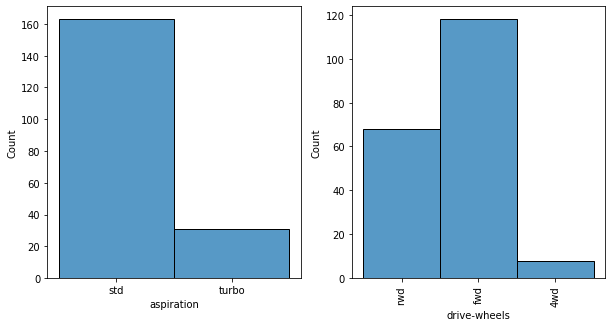

In [81]:
# Create subplots in the same figure
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
i = 0

for colname in ordinal_columns:
        sb.histplot(df[colname], ax=axes[i])
        plt.xticks(rotation=90)
        i += 1

plt.show()

Now that we know the values for these attributes, the next step is to implement the label encoding. If the value for an attribute is higher, it means the car is more expensive in general terms (*this was determined using data from **Kavak***):

In [82]:
# Using custom dictionary to apply labels since we knoe the order they should have
labels = {
    "aspiration" : {
        "std" : 0,
        "turbo" : 1
    },
    "drive-wheels" : {
        "rwd" : 0,
        "fwd" : 1,
        "4wd" : 2
    }
}

# Applying label encoding to ordinal attributes
for column in ordinal_columns:
    df[column] = df[column].astype("category")
    df[column] = df[column].map(labels[column])

df.head()

,symboling,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,0,2.0,convertible,0,front,93.0,168.8,...,130,mpfi,3.47,2.68,2.080084,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,0,2.0,convertible,0,front,93.0,168.8,...,130,mpfi,3.47,2.68,2.080084,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,0,2.0,hatchback,0,front,94.5,171.2,...,152,mpfi,2.97,3.47,2.080084,154.0,5000.0,19,26,16500.0
3,2,audi,gas,0,4.0,sedan,1,front,99.8,176.6,...,109,mpfi,3.19,3.40,2.154435,102.0,5500.0,24,30,13950.0
4,2,audi,gas,0,4.0,sedan,2,front,99.4,176.6,...,136,mpfi,3.19,3.40,2.000000,115.0,5500.0,18,22,17450.0


For the rest of the attributes, we'll apply **one-hot encoding**:

In [83]:
# Create list of nominal attributes
nominal_columns = ['make']

In [84]:
# Create encoder instance
oh_encoder = skp.OneHotEncoder(handle_unknown='ignore')

# Create new dataframe with encoding being applied
oh_df = pd.DataFrame(oh_encoder.fit_transform(df[nominal_columns]).toarray())

# Merge dataframes
df = df.join(oh_df)
df

,symboling,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,12,13,14,15,16,17,18,19,20,21
0,3,alfa-romero,gas,0,2.0,convertible,0,front,93.0,168.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,alfa-romero,gas,0,2.0,convertible,0,front,93.0,168.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,alfa-romero,gas,0,2.0,hatchback,0,front,94.5,171.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,audi,gas,0,4.0,sedan,1,front,99.8,176.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,audi,gas,0,4.0,sedan,2,front,99.4,176.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,-1,volvo,gas,0,4.0,sedan,0,front,109.1,188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
190,-1,volvo,gas,1,4.0,sedan,0,front,109.1,188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
191,-1,volvo,gas,0,4.0,sedan,0,front,109.1,188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192,-1,volvo,diesel,1,4.0,sedan,0,front,109.1,188.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
